# <center><font style="color:rgb(100,109,254)">Blur Detection</font><center>



###  <font style="color:rgb(134,19,348)"> Why Blur Detection    </font> 
So how do we go about blur detection and why do we even care.

Blur detection can be really good in many applications consider a face recognition application in where you are doing facial recognition live in a area where people are in move, because of the motion you often get blurred facial crops which greatly hinders the accuracy of the facial recognition model. Now an easy way to avoid this you can capture some `n` number of frames of the person's face and pick out the sharpest or the least blurred image and feed only that to the model. This way not only you get a high accuracy but you also save a lot of computation.

### <font style="color:rgb(134,19,348)"> How to Do Blur Detection  </font>
Now that we have seen the importance of Blur detection, lets see how we can go about implementing this, now it turns out there are large number of ways to extract the sharpest image from a bunch. I'm going to go over one popular and effective technique in which we can compute sharpness in just a single line of code. 

So that magic line is this: `cv2.Laplacian(img, cv2.CV_64F).var()` yes that's it, previously you have seen how we can get edges with laplacian, now you see we just take the Variation (standard Deviation Squared) of the laplacian to get the sharpness of the image, the higher the number returned from this function the sharper the image is.


### <font style="color:rgb(134,19,348)"> Intuition  </font> 
Alright we can see how to use this to get the sharpest image but why does this work ? , so its really simple, as you know the laplacian gives the information of high intensity changes i.e. the edges contained in the image, now a sharp image is one with lots of edges and vice versa and so by computing the variance of the contents in image it can give a high number which means lots of edges meaning lots of high intensity changes which is why it has a high variance and its vice versa for a low variance.

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## <font style="color:rgb(134,19,348)"> Performing Blur Detection </font> 
The below Code gives us a score for each image, see how the image which we gaussian blurreed gives a low score

variation of normal Image is 112.55965018277762
variation of Blurred Image is 9.510401922071354


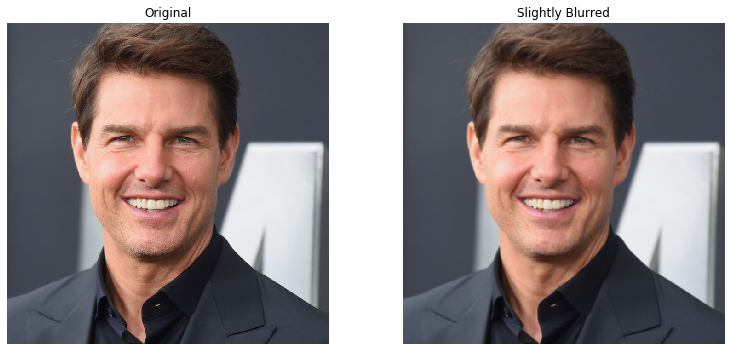

In [59]:
img = cv2.imread('media/M4/tomface1.jpg')
img_blurred = cv2.GaussianBlur(img,(5,5),0)


laplacian_variation = cv2.Laplacian(img, cv2.CV_64F).var()
laplacian_variation2 = cv2.Laplacian(img_blurred, cv2.CV_64F).var()

plt.figure(figsize=[13,13])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(222);plt.imshow(img_blurred[:,:,::-1]);plt.title("Slightly Blurred");plt.axis('off');

print('variation of normal Image is {}'.format(laplacian_variation))
print('variation of Blurred Image is {}'.format(laplacian_variation2))

Now if you just want to tell if an image is blurred or not then you can just set a threshold and if the variance falls below 
the threshold you declare the image as blurred.

Below code checks if image is blurred or not

In [60]:
images = [img, img_blurred]
threshold = 10

for img in images:
    laplacian_variation = cv2.Laplacian(img, cv2.CV_64F).var()
    if laplacian_variation < threshold:
        print('image is Blurred')
    else:
        print('image is Fine')

image is Fine
image is Blurred


**Note:** the threshold is highly dependent upon the resolution and the device from which the image was taken and you have to tune it for your particular use case


Lets blurr some images and display them

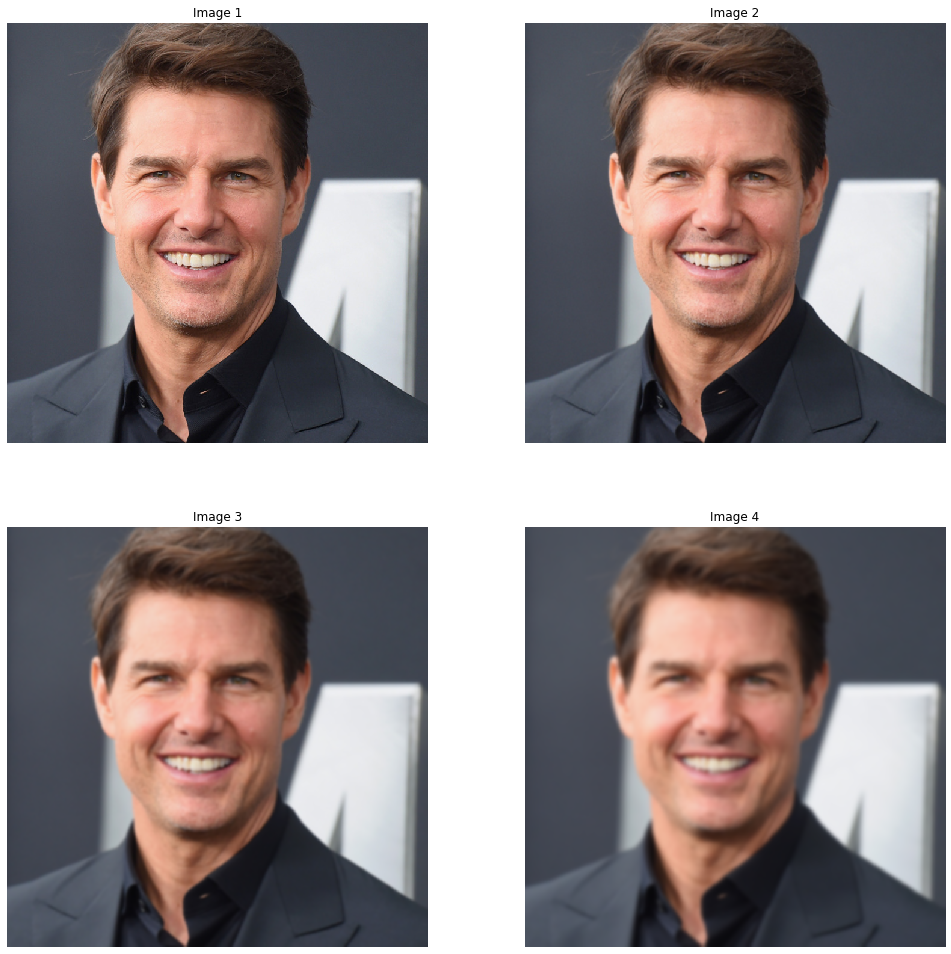

In [61]:
img = cv2.imread('media/M4/tomface1.jpg')
img2 = cv2.GaussianBlur(img,(3,3),0)
img3 = cv2.GaussianBlur(img,(11,11),0)
img4 = cv2.GaussianBlur(img,(19,19),0)

all_images = [img,img2,img3,img4]

plt.figure(figsize=[17,17])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Image 1");plt.axis('off');
plt.subplot(222);plt.imshow(img2[:,:,::-1]);plt.title("Image 2");plt.axis('off');
plt.subplot(223);plt.imshow(img3[:,:,::-1]);plt.title("Image 3");plt.axis('off');
plt.subplot(224);plt.imshow(img4[:,:,::-1]);plt.title("Image 4");plt.axis('off');

##  <font style="color:rgb(134,19,348)"> Sharpest Image Detection </font> 
Now the below script compares all 4 images and tells you which is the sharpest image among them

In [62]:
highest = None # this will contain the highest score i.e. the variance
index = None  # this will contain the index of the image which has the highest score

for index_of_image, img in enumerate(all_images,1):
    laplacian_variation = cv2.Laplacian(img, cv2.CV_64F).var()
    if highest is None:
        highest = laplacian_variation
        index = index_of_image        
    else:
        if highest < laplacian_variation:
            highest = laplacian_variation
            index = index_of_image
print("The Sharpest Image is Image {} with value {}".format(index,highest))                

The Sharpest Image is Image 1 with value 112.55965018277762
